In [1]:
!pip install py-linq
!python --version
from py_linq import Enumerable
from scipy import constants
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 829 kB 7.4 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=1bfee8f7cdf053f4a46093f0deab41e0c88d17c09996ba5f1fd2364bae42672b
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
Python 3.7.13


In [ ]:
# Some helpfull functions. Nothing to see here. 
def distance(x1, x2, y1, y2):
  res = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
  return res
def intersect(x1, x2, y1, y2, eps):
  if len(x1) != len(y1) or len(x2) != len(y2) or len(x2) != len(x1):
    assert("len x and len y should be equal")

  points = []
  for i in range(len(x1)):
    dist = distance(x1[i], x2[i], y1[i], y2[i])
    if dist <= eps:
      points.append((x1[i], y1[i], dist))
    
  points = Enumerable(points)
  min_dist = points.select(lambda x: x[2]).min()
  min_point = points.where(lambda x: x[2] == min_dist).first()
  if min_point is None:
    assert('No intersection found')

  return (min_point[0], min_point[1])
  
def print_points_table(points):
  print('\\begin{tabular}{| c | c | c |}')
  print('\\hline\nn  & x  & y \\\\')
  for i in range(len(points)):
    print(f'\\hline\n{i + 1} & {points[i][0]:.3f}  & {points[i][1]:.3f} \\\\')
  print('\\hline\n\\end{tabular}')

def gorgeous_scientific_print(x):
  for i in x:
    print(f'{i:.3e}', end = " ")

Используя уравнение Шредингера, найти связные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы 
$V(x) =$ 
\begin{cases}
    -U & |x| < a\\
    0 & |x| > a
\end{cases}
Найти также собственные функции и собственные значения для осцилляторного потенциала $V(x) = \frac{1}{2}m\omega^2x^2$ Построить графически собственные функции. Рассмотреть случай, когда в точке $x=0$ вводится бесконечно узкая и бесконечная полупроницаемая перегородка. Выявить влияние такой перегородки на стационарные состояния.


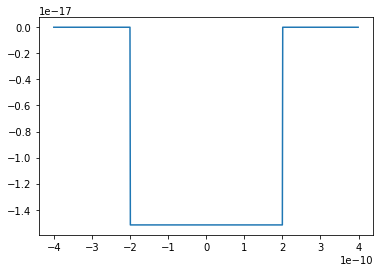

In [ ]:
from scipy import constants
import math
import matplotlib.pyplot as plt
import numpy as np

a = 2e-10
U = 15.168e-18
omega = 1
m = constants.electron_mass
eps = int(1e7)

def V(x: float) -> float:
  if(abs(x) <= a):
    return -U
  else:
    return 0

def Vo(x: float ) -> float:
  return 1/2 * m * omega ** 2 * x ** 2

xMin = -a - a
xMax = a + a
x = np.arange(xMin, xMax, 1e-12)

y = []

for i in range(len(x)):
    y.append(V(x[i]))

plt.plot(x, y)
plt.show()

Уравнение шредингера\
$$\nabla^2\Psi + \frac{2m}{\hbar^2}(E-V(x))\Psi = 0$$
$$\frac{\partial^2\Psi}{\partial x^2}\Psi + \frac{2m}{\hbar^2}(E-V(x))\Psi = 0$$
Следовательно

\begin{cases}
\frac{\partial^2\Psi}{\partial x^2}\Psi + \frac{2m}{\hbar^2}E, \forall |x| > a\\
\frac{\partial^2\Psi}{\partial x^2}\Psi + \frac{2m}{\hbar^2}(E+U), \forall |x| < a
\end{cases}
введем дополнительные обозначения
$$k_1^2 = -\frac{2m}{\hbar}E$$
$$k_2^2 = \frac{2m}{\hbar}(E+U)$$
Следовательно
\begin{cases}
\Psi_1(x) = A_1e^{k_1x} & x < -a\\
\Psi_2(x) = A_2e^{ik_2x}+B_2e^{-ik_2x} & |x| < a\\
\Psi_3(x) = B_3e^{-k_1x} & x > a\\
\end{cases}

Выполним сшивание

\begin{cases}
\Psi_1(-a)=\Psi_2(-a)\\
\Psi'_1(-a)=\Psi'_2(-a)\\
\Psi_2(a)=\Psi_3(a)\\
\Psi'_2(a)=\Psi'_3(a)\\
\end{cases}

Так как яма симметрична относительно 0 можно рассмотреть только правую границу

\begin{cases}
\Psi_1(a)=\Psi_2(a)\\
\Psi'_1(a)=\Psi'_2(a)\\
\end{cases}

Сшивая уравнения и исключая параметр $\alpha$ прийдем к уравнению вида
$$k_2a = \pi n - 2\arcsin(\frac{\hbar k_2}{\sqrt{2mU}})$$

max k_2: 49847972030.56565


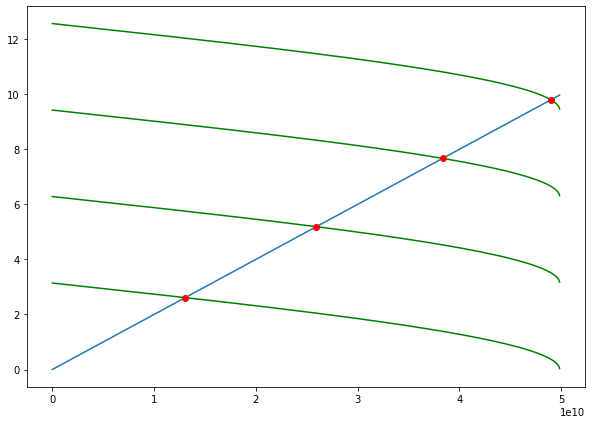

\begin{tabular}{| c | c | c |}
\hline
n  & x  & y \\
\hline
1 & 13060000000.000  & 2.612 \\
\hline
2 & 25940000000.000  & 5.188 \\
\hline
3 & 38350000000.000  & 7.670 \\
\hline
4 & 48990000000.000  & 9.798 \\
\hline
\end{tabular}


In [ ]:
k_2 = math.sqrt(2 * m * U) / constants.hbar

plt.figure(figsize=(10, 7))

print(f"max k_2: {k_2}")

lefty = np.arange(0, k_2, eps, dtype=float) * a
leftx = np.arange(0, k_2, eps)
n = math.ceil(k_2 * a / constants.pi)

plt.plot(leftx, lefty)

res = []

for i in range(1, n + 1):
    rightx = []
    righty = []
    for j in range(0, int(k_2), eps):
        rightx.append(j)
        righty.append(constants.pi * i - 2 * math.asin((constants.hbar * j) / math.sqrt(2 * constants.electron_mass * U)))
    
    plt.plot(rightx, righty, color='green')
    point = intersect(leftx, rightx, lefty, righty, eps)
    plt.plot(point[0], point[1], 'bo', color='red')
    res.append((point[0], point[1]))

plt.show()
print_points_table(res)

$$E_n = \frac{\hbar^2k_n^2}{2m}$$
$$\Psi_n(x) = \sqrt\frac{a}{2}\sin(\frac{\pi nx}{a})$$

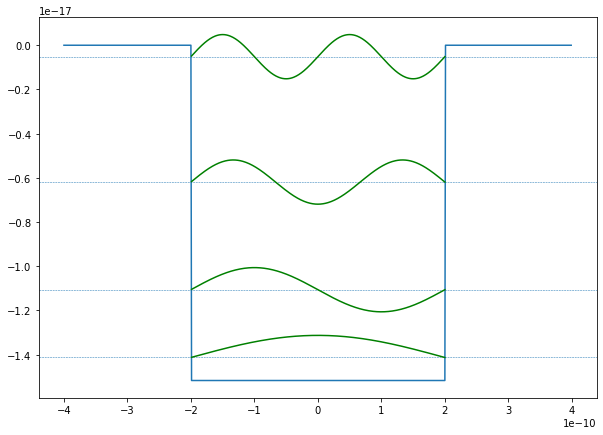

1.041e-18 4.107e-18 8.978e-18 1.465e-17 

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
energy = [0] * len(res)

def psi(x: float, n: int, scale: float = 1e23) -> float:
    if abs(x) > a:
        return 0
    return math.sqrt(2 / a) * math.sin(constants.pi * (n + 1) * x / (2*a) + (n + 1) * constants.pi / 2) / scale

for i in range(len(res)):
    energy[i] = constants.hbar ** 2 * res[i][0] ** 2 / (2 * m)
    plt.axhline(y=energy[i] - U, linestyle="--", linewidth = 0.5)
    
    y_psi = []
    x_psi = []
    for j in range(len(x)):
        tmp = psi(x[j], i)
        if tmp != 0:
          y_psi.append(tmp + (energy[i] - U))
          x_psi.append(x[j])
    
    plt.plot(x_psi, y_psi, color='green')

plt.show()
gorgeous_scientific_print(energy)

Уравнение шредингера для стационарных состояний одномерного осциллятора:
$$-\frac{\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2}+\frac{m\omega^2x^2}{2}\Psi = E\Psi$$
Введем новую переменную 
$$\xi = x\sqrt\frac{m}{\hbar}$$
Преобразуем уравнение шредингера
$$\frac{\partial^2\Psi}{\partial \xi^2}+(\lambda - \xi^2)\Psi = 0$$
Отсюда можно вывести 
$$E_n=\hbar\omega(n+\frac{1}{2})$$
$$\Psi = C_n*P_n(\xi)\exp(-\frac{\xi^2}{2})$$

In [ ]:
def hermite(xi: float, n: int) -> float:
    array = [0] * (n) + [1]
    hermite = np.polynomial.hermite.Hermite(array)
    return hermite(xi)

def psi_osc(x, E: float, n: int):
    points = []
    for i in range(len(x)):
        xi = x[i]*math.sqrt(constants.electron_mass * omega / constants.hbar)
        coef = 1 / (math.sqrt(2 ** n * math.factorial(n))) * (constants.electron_mass * omega / (constants.hbar * constants.pi)) ** 0.25
        point = coef * constants.electron_mass / 15e4 * math.exp(-0.5 * xi ** 2) * hermite(xi, n) + E
        points.append(point)
        
    return points

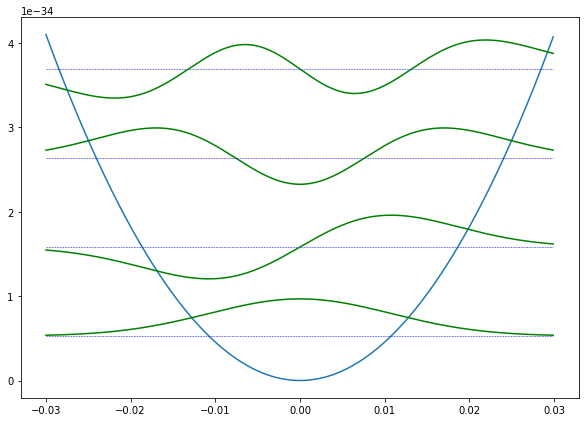

5.273e-35 1.582e-34 2.636e-34 3.691e-34 

In [ ]:
plt.figure(figsize=(10, 7))
eps = 1e-4
x2 = np.arange(-3e-2, 3e-2, eps)
y2 = []

for i in range(len(x2)):
    y2.append(Vo(x2[i]))
    
plt.plot(x2, y2)

res = []

n = 0
while True:
    E = (n + 0.5) * constants.hbar * omega
    
    if (E > y2[0]):
        break
    
    res.append(E)
        
    plt.plot(x2, [E] * len(x2), linestyle="--", color = 'blue', linewidth = 0.5)
    plt.plot(x2, psi_osc(x2, E, n), color = 'green')
    n += 1

plt.show()
gorgeous_scientific_print(res)

In [ ]:
# from scipy.optimize import minimize_scalar
# eps2 = 10e-3
# n2 = 5
# om = [0, 1/4, 1/2, 1, 2, 4, 10, 100, 1000, 1e+6]
# n3 = len(om)
# kna = np.zeros((n3, n2))
# oma = np.zeros(n2)
# for nz in range(n3):
#   z = om[nz]
#   func = lambda y: y * cot(y) + z
#   for n in range(1, n2 + 1):
#     print(f'{func(math.pi*(n-0.5))} {func(math.pi*n)}')
#     kna[nz, n - 1] = minimize_scalar(lambda y: y * cos(y)/sin(y) + z, bounds = (float(math.pi*(n-0.5)), float(math.pi*n)), method='bounded' )
    
# print(kna)
